In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

# etc...

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [3]:
# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


In [4]:
# Eliminamos las columnas ID,Listing URL, ScarpeID,Last Scraped... todas las columnas que nos nos aportan información relevante. 

eliminar_col=['ID','Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Neighborhood Overview',
              'Space', 'Description', 'Notes' ,'Transit', 'Access', 'Interaction', 'House Rules',
              'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
              'Host Name', 'Host Location', 'Host About', 'Host Thumbnail Url','Host Picture Url', 
              'Host Neighbourhood', 'Host Listings Count','Host Total Listings Count','Street','State', 'Zipcode',
                'Market', 'Smart Location', 'Calendar last Scraped', 'First Review', 'Last Review','Calculated host listings count', 'Reviews per Month', 'Geolocation','Features',
              'Host Since'
             ]

df.drop(eliminar_col, axis=1, inplace=True)


In [5]:
#vamos a ver qué valores únicos hay por columna
df.nunique()  


Experiences Offered                 5
Host Response Time                  4
Host Response Rate                 67
Host Acceptance Rate               10
Host Verifications                191
Neighbourhood                     351
Neighbourhood Cleansed            444
Neighbourhood Group Cleansed       47
City                              222
Country Code                       18
Country                            17
Latitude                        11824
Longitude                       11824
Property Type                      21
Room Type                           3
Accommodates                       16
Bathrooms                          17
Bedrooms                           10
Beds                               16
Bed Type                            5
Amenities                       10077
Square Feet                        89
Price                             345
Weekly Price                      357
Monthly Price                     521
Security Deposit                  115
Cleaning Fee

In [6]:
#Country y Country_code arrojan la misma info...
eliminar_col_extra=['Country','Review Scores Accuracy']

df.drop(eliminar_col_extra, axis=1, inplace=True)

In [7]:
#hay que ver qué columnas tienen valores nulos y cuántos son
df.isnull().sum()

Experiences Offered                 0
Host Response Time               1507
Host Response Rate               1507
Host Acceptance Rate            11794
Host Verifications                  4
Neighbourhood                    4159
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed      818
City                                4
Country Code                        0
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          44
Bedrooms                           20
Beds                               37
Bed Type                            0
Amenities                         141
Square Feet                     11350
Price                              15
Weekly Price                     8943
Monthly Price                    8955
Security Deposit                 6772
Cleaning Fee                     4850
Guests Inclu

In [8]:
#vemos que hay 3 tipos de barrios donde NC y NGC presentan diferencias. Donde uno presenta más valores únicos, el otro presenta más NAs. Habrá que realizar un "merge" de ambos campos y generar uno nuevo.
#Para esto, vamos a rellenar los NAs de de NGC con la info de NC. 

df['Neighbourhood New']= df['Neighbourhood Group Cleansed'].fillna(df['Neighbourhood Cleansed'])

barrios_elim=['Neighbourhood Cleansed','Neighbourhood Group Cleansed','Neighbourhood']
df.drop(barrios_elim, axis=1, inplace=True)


In [9]:
#Eliminamos aquellas columnas que tienen muchos valores nulos...
eliminar_col_nulos=['License','Jurisdiction Names','Square Feet','Host Acceptance Rate', 'Has Availability']

df.drop(eliminar_col_nulos, axis=1, inplace=True)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,10317.0,94.803722,15.247078,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,11824.0,40.491628,4.701030,-37.851182,40.409758,40.419331,40.430778,55.966912
Longitude,11824.0,-3.776863,14.014695,-123.124429,-3.707538,-3.700763,-3.683917,153.371427
Accommodates,11824.0,3.277486,2.093973,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11780.0,1.285229,0.664691,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11804.0,1.344290,0.905180,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11787.0,2.049122,1.623489,1.000000,1.000000,2.000000,2.000000,16.000000
Price,11809.0,73.712592,71.624844,9.000000,34.000000,55.000000,87.000000,969.000000
Weekly Price,2881.0,378.437348,194.751472,70.000000,220.000000,350.000000,500.000000,999.000000
Monthly Price,2869.0,1432.390728,1236.992934,250.000000,720.000000,1200.000000,1750.000000,25000.000000


In [11]:
df.shape
df.dtypes

Experiences Offered             object
Host Response Time              object
Host Response Rate             float64
Host Verifications              object
City                            object
Country Code                    object
Latitude                       float64
Longitude                      float64
Property Type                   object
Room Type                       object
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Bed Type                        object
Amenities                       object
Price                          float64
Weekly Price                   float64
Monthly Price                  float64
Security Deposit               float64
Cleaning Fee                   float64
Guests Included                  int64
Extra People                     int64
Minimum Nights                   int64
Maximum Nights                   int64
Calendar Updated         

In [12]:
#Seleccionamos las variables no numéricas y vamos a revisar qué valores arrojan para, en función de su utilidad, eliminarlas o no
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 12 columns):
Experiences Offered    11824 non-null object
Host Response Time     10317 non-null object
Host Verifications     11820 non-null object
City                   11820 non-null object
Country Code           11824 non-null object
Property Type          11824 non-null object
Room Type              11824 non-null object
Bed Type               11824 non-null object
Amenities              11683 non-null object
Calendar Updated       11824 non-null object
Cancellation Policy    11824 non-null object
Neighbourhood New      11824 non-null object
dtypes: object(12)
memory usage: 1.1+ MB


In [13]:
df['Experiences Offered'].value_counts()

none        11810
business        6
social          3
family          3
romantic        2
Name: Experiences Offered, dtype: int64

In [14]:
df['Host Response Time'].value_counts()

within an hour        6337
within a few hours    2291
within a day          1448
a few days or more     241
Name: Host Response Time, dtype: int64

In [15]:
df['Host Verifications'].value_counts()

email,phone,reviews,jumio                                                                   2952
email,phone,reviews                                                                         2817
email,phone,reviews,jumio,government_id                                                      704
email,phone,facebook,reviews,jumio                                                           680
email,phone,facebook,reviews                                                                 590
                                                                                            ... 
email,phone,google,linkedin,reviews,jumio,offline_government_id,government_id,work_email       1
email,phone,facebook,google,linkedin,reviews,jumio,government_id,work_email                    1
email,phone,facebook,google,linkedin,reviews,manual_offline,jumio                              1
email,phone,amex,reviews,jumio,work_email                                                      1
email,phone,facebook,jumio,off

In [16]:
df['City'].value_counts()

Madrid                      10567
Barcelona                     235
London                        104
Paris                          85
Palma                          44
                            ...  
Son Veri Nou , Llucmajor        1
Frederiksberg C                 1
Boadilla del Monte              1
Cologny                         1
Brent                           1
Name: City, Length: 222, dtype: int64

In [17]:
df['Country Code'].value_counts()

ES    11203
US      139
GB      127
FR       87
IT       61
AU       38
IE       34
DE       33
AT       26
NL       19
BE       16
CA       16
DK       14
CH        4
GR        3
HK        2
It        1
CU        1
Name: Country Code, dtype: int64

In [18]:
df['Property Type'].value_counts()

Apartment             9598
House                 1085
Condominium            284
Bed & Breakfast        274
Loft                   248
Other                  171
Dorm                    37
Guesthouse              32
Chalet                  22
Villa                   15
Townhouse               15
Hostel                  13
Serviced apartment       9
Boutique hotel           5
Casa particular          3
Boat                     3
Camper/RV                3
Earth House              2
Bungalow                 2
Guest suite              2
Tent                     1
Name: Property Type, dtype: int64

In [19]:
list(df.select_dtypes(include=['object']).columns)

['Experiences Offered',
 'Host Response Time',
 'Host Verifications',
 'City',
 'Country Code',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Amenities',
 'Calendar Updated',
 'Cancellation Policy',
 'Neighbourhood New']

In [20]:
len(df) - df.count() 

Experiences Offered               0
Host Response Time             1507
Host Response Rate             1507
Host Verifications                4
City                              4
Country Code                      0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                        44
Bedrooms                         20
Beds                             37
Bed Type                          0
Amenities                       141
Price                            15
Weekly Price                   8943
Monthly Price                  8955
Security Deposit               6772
Cleaning Fee                   4850
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Calendar Updated                  0
Availability 30                   0
Availability 60             

In [21]:
##vemos que las que tienen más valores nulos son Host Response Time y Amenities y City y Host verifications 
df['City'].replace(np.nan,"",inplace=True)
df['Host Verifications'].replace(np.nan,"",inplace=True)
df['Amenities'].replace(np.nan,"",inplace=True)
df["Host Response Time"].replace(np.nan,"",inplace=True)
df["Host Response Rate"].replace(np.nan,df["Host Response Rate"].mean(),inplace=True)
df["Bathrooms"].replace(np.nan,1,inplace=True)
df["Beds"].replace(np.nan,1,inplace=True)
df["Bedrooms"].replace(np.nan,1,inplace=True)
df["Price"].replace(np.nan,df["Price"].mean(),inplace=True)
df["Security Deposit"].replace(np.nan,1,inplace=True)
df["Cleaning Fee"].replace(np.nan,1,inplace=True)
df["Review Scores Value"].replace(np.nan,0,inplace=True)

In [22]:
df['Host Response Time'].value_counts()

within an hour        6337
within a few hours    2291
                      1507
within a day          1448
a few days or more     241
Name: Host Response Time, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(df['Host Response Time'])
df['Host Response Time']= le.transform(df['Host Response Time'])

In [24]:
df['lbl_Amenities']= [len(amenities.split(",")) for amenities in df['Amenities']]

df.drop('Amenities', axis=1, inplace=True)

In [25]:
categorical = ['Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy',
 'Neighbourhood New','City'
]

# Creamos un dict para usarlo después en test
mean_map = {}
for c in categorical:
    mean = df.groupby(c)['Price'].mean()
    df[c] = df[c].map(mean)    
    mean_map[c] = mean


In [26]:
df.head()

,Experiences Offered,Host Response Time,Host Response Rate,Host Verifications,City,Country Code,Latitude,Longitude,Property Type,Room Type,...,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Neighbourhood New,lbl_Amenities
0,none,3,100.0,"email,phone,reviews,work_email",66.190849,ES,40.407732,-3.684819,72.295908,95.062893,...,12,95.0,10.0,10.0,10.0,10.0,9.0,65.089622,70.069417,13
1,none,4,100.0,"email,phone,reviews,jumio,offline_government_i...",66.190849,ES,40.415802,-3.705340,72.295908,95.062893,...,20,91.0,9.0,10.0,10.0,10.0,10.0,64.209339,72.889589,18
2,none,4,100.0,"email,phone,facebook,google,reviews,jumio,gove...",66.190849,ES,40.389048,-3.740374,72.295908,31.320988,...,0,NaN,NaN,NaN,NaN,NaN,0.0,65.089622,39.716263,25
3,none,3,100.0,"email,phone,reviews,work_email",66.190849,ES,40.412814,-3.703052,72.295908,40.909511,...,0,NaN,NaN,NaN,NaN,NaN,0.0,86.962930,72.889589,5
4,none,4,100.0,"email,phone,reviews,jumio",66.190849,ES,40.438631,-3.713716,72.295908,40.909511,...,97,92.0,9.0,9.0,10.0,9.0,9.0,86.962930,72.671949,15


In [27]:
#Eliminamos aquellas columnas que no nos interesan
col_nul=['Experiences Offered','Host Verifications','Country Code','Weekly Price','Monthly Price','Review Scores Rating','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Calendar Updated']

df.drop(col_nul, axis=1, inplace=True)

In [28]:
len(df) - df.count() 

Host Response Time     0
Host Response Rate     0
City                   0
Latitude               0
Longitude              0
Property Type          0
Room Type              0
Accommodates           0
Bathrooms              0
Bedrooms               0
Beds                   0
Bed Type               0
Price                  0
Security Deposit       0
Cleaning Fee           0
Guests Included        0
Extra People           0
Minimum Nights         0
Maximum Nights         0
Availability 30        0
Availability 60        0
Availability 90        0
Availability 365       0
Number of Reviews      0
Review Scores Value    0
Cancellation Policy    0
Neighbourhood New      0
lbl_Amenities          0
dtype: int64

In [29]:
df.head()

,Host Response Time,Host Response Rate,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,...,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Value,Cancellation Policy,Neighbourhood New,lbl_Amenities
0,3,100.0,66.190849,40.407732,-3.684819,72.295908,95.062893,4,1.0,1.0,...,1125,9,32,52,117,12,9.0,65.089622,70.069417,13
1,4,100.0,66.190849,40.415802,-3.705340,72.295908,95.062893,4,1.0,1.0,...,1125,15,39,64,208,20,10.0,64.209339,72.889589,18
2,4,100.0,66.190849,40.389048,-3.740374,72.295908,31.320988,1,1.5,1.0,...,30,14,44,74,140,0,0.0,65.089622,39.716263,25
3,3,100.0,66.190849,40.412814,-3.703052,72.295908,40.909511,2,3.0,1.0,...,1125,0,6,36,311,0,0.0,86.962930,72.889589,5
4,4,100.0,66.190849,40.438631,-3.713716,72.295908,40.909511,2,1.0,1.0,...,1125,7,34,62,337,97,9.0,86.962930,72.671949,15


In [30]:
df.dtypes

Host Response Time       int32
Host Response Rate     float64
City                   float64
Latitude               float64
Longitude              float64
Property Type          float64
Room Type              float64
Accommodates             int64
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type               float64
Price                  float64
Security Deposit       float64
Cleaning Fee           float64
Guests Included          int64
Extra People             int64
Minimum Nights           int64
Maximum Nights           int64
Availability 30          int64
Availability 60          int64
Availability 90          int64
Availability 365         int64
Number of Reviews        int64
Review Scores Value    float64
Cancellation Policy    float64
Neighbourhood New      float64
lbl_Amenities            int64
dtype: object

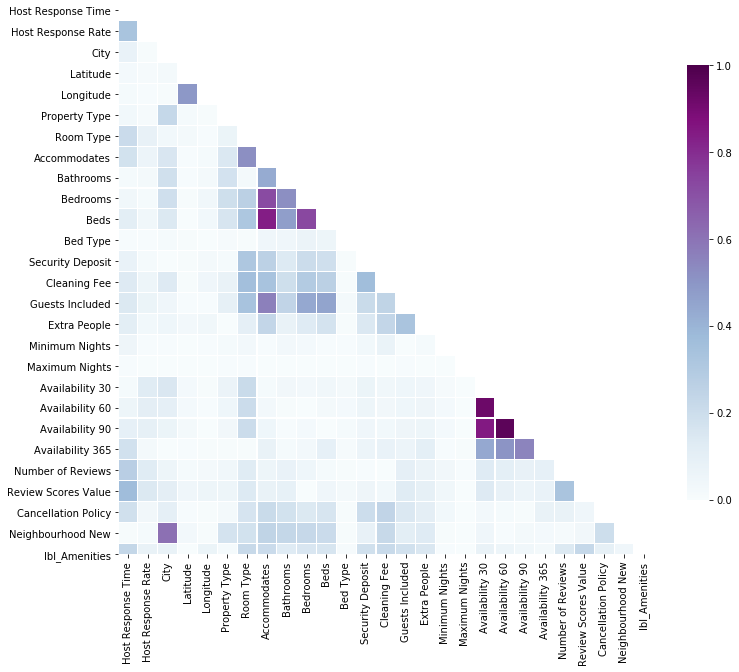

In [31]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="BuPu", cbar_kws={"shrink": .8})

plt.show()

In [32]:
df.corr() # realizo la matriz de correlación para asegurar "el tiro". 

,Host Response Time,Host Response Rate,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,...,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Value,Cancellation Policy,Neighbourhood New,lbl_Amenities
Host Response Time,1.000000,0.333591,-0.076116,0.022501,-0.017800,-0.033484,0.209478,0.178031,-0.017405,0.042761,...,0.006417,-0.018357,0.055613,0.092676,0.182938,0.275529,0.370589,0.186759,0.008736,0.233544
Host Response Rate,0.333591,1.000000,0.010225,-0.014578,0.005866,-0.012702,0.085033,0.062441,-0.025409,0.016371,...,0.001373,-0.126483,-0.107571,-0.096092,-0.025077,0.127169,0.142872,0.038097,0.016130,0.080023
City,-0.076116,0.010225,1.000000,-0.024740,0.008878,0.227660,0.034167,0.152788,0.184395,0.190346,...,-0.001660,0.151483,0.098330,0.064416,-0.003670,-0.057361,-0.105644,0.101087,0.610295,-0.078714
Latitude,0.022501,-0.014578,-0.024740,1.000000,-0.493585,-0.018310,0.024755,0.006899,-0.006496,-0.010106,...,0.000004,-0.020268,-0.022806,-0.025122,-0.006911,0.018777,0.044808,0.007675,-0.029160,0.002861
Longitude,-0.017800,0.005866,0.008878,-0.493585,1.000000,-0.008573,0.006364,0.018478,0.027074,0.039558,...,0.002385,0.010459,0.004824,-0.000284,-0.008742,-0.023857,-0.058389,0.009985,0.011071,-0.066306
Property Type,-0.033484,-0.012702,0.227660,-0.018310,-0.008573,1.000000,0.065424,0.148238,0.172320,0.195021,...,0.003959,0.069418,0.050265,0.037370,0.008998,-0.042411,-0.057299,0.026478,0.170153,0.017288
Room Type,0.209478,0.085033,0.034167,0.024755,0.006364,0.065424,1.000000,0.522522,0.026265,0.267855,...,0.007722,-0.213172,-0.205211,-0.206263,-0.011428,0.126466,0.139197,0.167404,0.177737,0.219987
Accommodates,0.178031,0.062441,0.152788,0.006899,0.018478,0.148238,0.522522,1.000000,0.432064,0.722549,...,0.001250,-0.016246,-0.027591,-0.047157,0.078856,0.057135,0.079167,0.213462,0.248988,0.208433
Bathrooms,-0.017405,-0.025409,0.184395,-0.006496,0.027074,0.172320,0.026265,0.432064,1.000000,0.521187,...,-0.003042,0.036803,0.008067,-0.007193,0.016497,-0.076646,-0.087922,0.179323,0.233075,0.131867
Bedrooms,0.042761,0.016371,0.190346,-0.010106,0.039558,0.195021,0.267855,0.722549,0.521187,1.000000,...,0.000262,0.028965,0.001704,-0.022411,0.027707,-0.047316,-0.001750,0.141204,0.224569,0.152733


In [33]:
#vamos a quitar los valores con una correlación mayor a 0.9 por ser posible fuente de error. Y los menores a 0.6 por tener una correlación bastante baja

eliminar_col_correl=['Latitude','Longitude','Minimum Nights','Maximum Nights','Number of Reviews','Availability 30','Availability 60','Availability 90','Availability 365']

df.drop(eliminar_col_correl, axis=1, inplace=True)

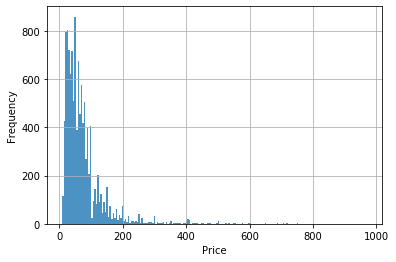

In [34]:
df['Price'].plot.hist(alpha=0.8, bins=200, grid = True)
plt.xlabel('Price')
plt.show()

Con esta gráfica vemos que, a partir de 150/160 €, los valores son atípicos por lo que tendremos que aplicar un filtro a partir de ese precio para reducir la aparición de estos valores

In [35]:
#hacemos lo mismo que hemos hecho en train pero para test

test = pd.read_csv('./test.csv', sep=';', decimal='.')

test.drop(eliminar_col, axis=1, inplace=True)

test.drop(eliminar_col_extra, axis=1, inplace=True)

test['Neighbourhood New']= test['Neighbourhood Group Cleansed'].fillna(test['Neighbourhood Cleansed'])
test.drop(barrios_elim, axis=1, inplace=True)

test.drop(eliminar_col_nulos, axis=1, inplace=True)

test['City'].replace(np.nan,"",inplace=True)
test['Host Verifications'].replace(np.nan,"",inplace=True)
test['Amenities'].replace(np.nan,"",inplace=True)
test["Host Response Time"].replace(np.nan,"",inplace=True)
test["Host Response Rate"].replace(np.nan,df["Host Response Rate"].mean(),inplace=True)
test["Bathrooms"].replace(np.nan,1,inplace=True)
test["Beds"].replace(np.nan,1,inplace=True)
test["Bedrooms"].replace(np.nan,1,inplace=True)
test["Price"].replace(np.nan,df["Price"].mean(),inplace=True)
test["Security Deposit"].replace(np.nan,1,inplace=True)
test["Cleaning Fee"].replace(np.nan,1,inplace=True)
test["Review Scores Value"].replace(np.nan,0,inplace=True)

test['Host Response Time']= le.transform(test['Host Response Time'])

test['lbl_Amenities']= [len(amenities.split(",")) for amenities in test['Amenities']]
test.drop('Amenities', axis=1, inplace=True)

for k,v in mean_map.items():
    test[k] = test[k].map(v)    

# Rellenar los nan despues del mean_map
for k in mean_map.keys():
    test[k].replace(np.nan, 0, inplace=True)
    
test.drop(col_nul, axis=1, inplace=True)

test.drop(['Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews','Latitude',
       'Longitude'],axis=1, inplace=True)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


y_train = df["Price"]     # nos quedamos con la 1ª columna, price
X_train = df.drop("Price",axis=1)      # nos quedamos con el resto

feature_names = df.columns[1:]

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

best mean cross-validation score: 0.574
best parameters: {'alpha': 0.03162277660168379}


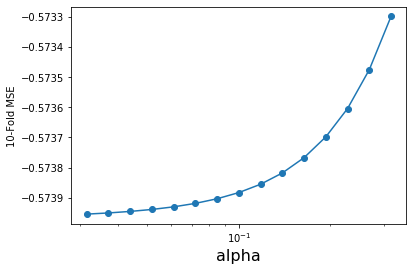

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import SCORERS

alpha_vector = np.logspace(-1.5,-0.5,15)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), param_grid=param_grid, cv = 20)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

Con esta gráfica vemos los resultados del algortimo Lasso. Es decir, vemos el valor de alpha a lo largo de las iteraciones siendo el mejor valor el mínimo: 0.03162277660168379  

In [38]:
y_test = test["Price"]     
X_test = test.drop("Price",axis=1)      

XtestScaled = scaler.transform(X_test)

In [39]:
from sklearn.metrics import mean_squared_error 

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.5g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.5g' % mseTestModelLasso)

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)
    
#con esto podemos ver que el modelo tiene un valor muy similar para test y para train

MSE Modelo Lasso (train): 2115.7
MSE Modelo Lasso (test) : 2896.4
Host Response Rate -1.9859953335919174
City -1.1679526775836482
Property Type 30.50819664543586
Room Type -3.006503147551443
Accommodates 10.902743201743595
Bathrooms 17.25138557343432
Bedrooms 7.689071383852466
Beds 8.782586746312194
Bed Type -4.412358356352485
Price 0.485302693744391
Security Deposit 2.13909298194159
Cleaning Fee 13.16876104453402
Guests Included 1.2791636606821117
Extra People -4.29247246649989
Review Scores Value -5.052631931944464
Cancellation Policy -1.8433604822674825
Neighbourhood New 2.635488378264178
lbl_Amenities 1.577279528722409


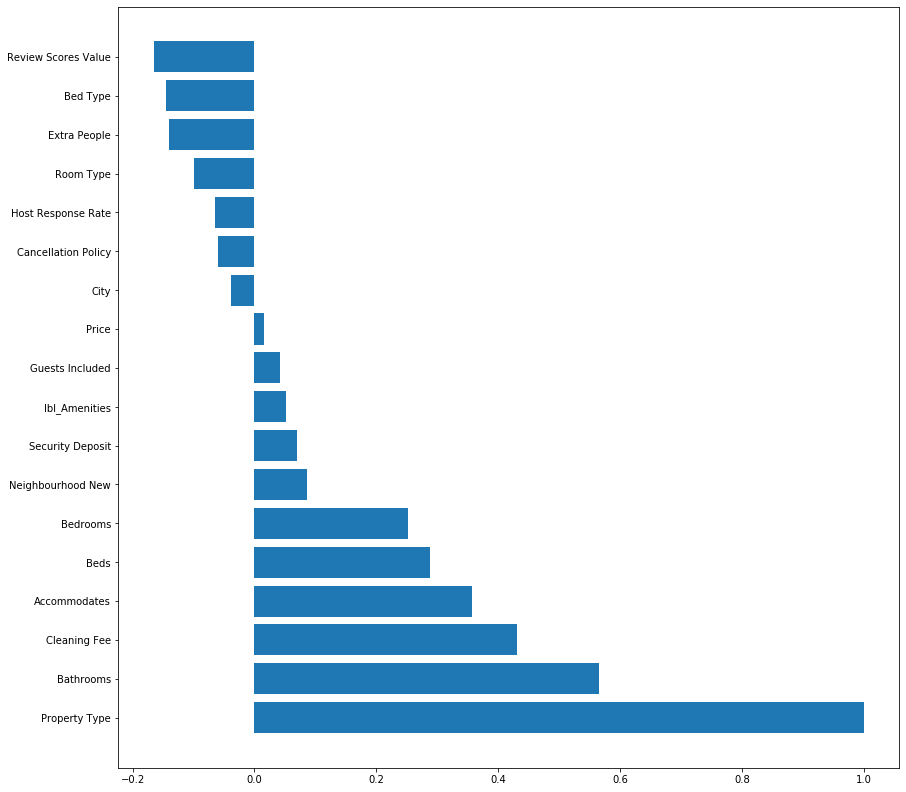

In [45]:
importances = lasso.coef_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14,14))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

#con la gráfica confirmamos que el determinante sería el tipo de propiedad

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500, 1000, 5000, 8000]
learningRate = [0.1, 0.01]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.671
best parameters: {'learning_rate': 0.1, 'n_estimators': 500}


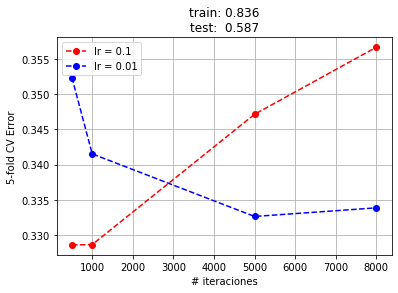

In [47]:
learning_rate = grid.best_params_['learning_rate']
NEstimators = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=learning_rate, n_estimators=NEstimators)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

#esto nos indica que el modelo no es el mejor ya que funciona bastante bien en train pero falla en test ya que el valor no está muy cercano al 1